In [17]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib.patches import RegularPolygon
import matplotlib

In [18]:
from astropy.io import fits

In [19]:
with fits.open("lvmsurveysim_hz_1000.fits") as hdul:
    my_data = hdul[1].data

In [20]:
my_data = my_data[my_data["ra"]>-500]

In [21]:
my_data.columns

ColDefs(
    name = 'JD'; format = 'D'
    name = 'observatory'; format = '10A'
    name = 'target'; format = '20A'
    name = 'group'; format = '20A'
    name = 'index'; format = 'K'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'pixel'; format = 'K'
    name = 'nside'; format = 'K'
    name = 'airmass'; format = 'D'
    name = 'lunation'; format = 'D'
    name = 'shadow_height'; format = 'D'
    name = 'moon_dist'; format = 'D'
    name = 'lst'; format = 'D'
    name = 'exptime'; format = 'D'
    name = 'totaltime'; format = 'D'
)

In [22]:
myset = set(my_data.target)
print(myset)

#my_data.target

{'SMC', 'MW2', 'THOR', 'MW1', 'LMC', 'FULLSKY', 'ORION', 'ORION_SPARSE'}


In [23]:
ra = my_data["ra"]
dec = my_data["dec"]

c = SkyCoord(ra=ra*u.degree, dec=dec*u.degree)
b = c.transform_to("galactic")

SMC
MW2
THOR
MW1
LMC
FULLSKY
ORION
ORION_SPARSE


Text(0, 0.5, 'DEC')

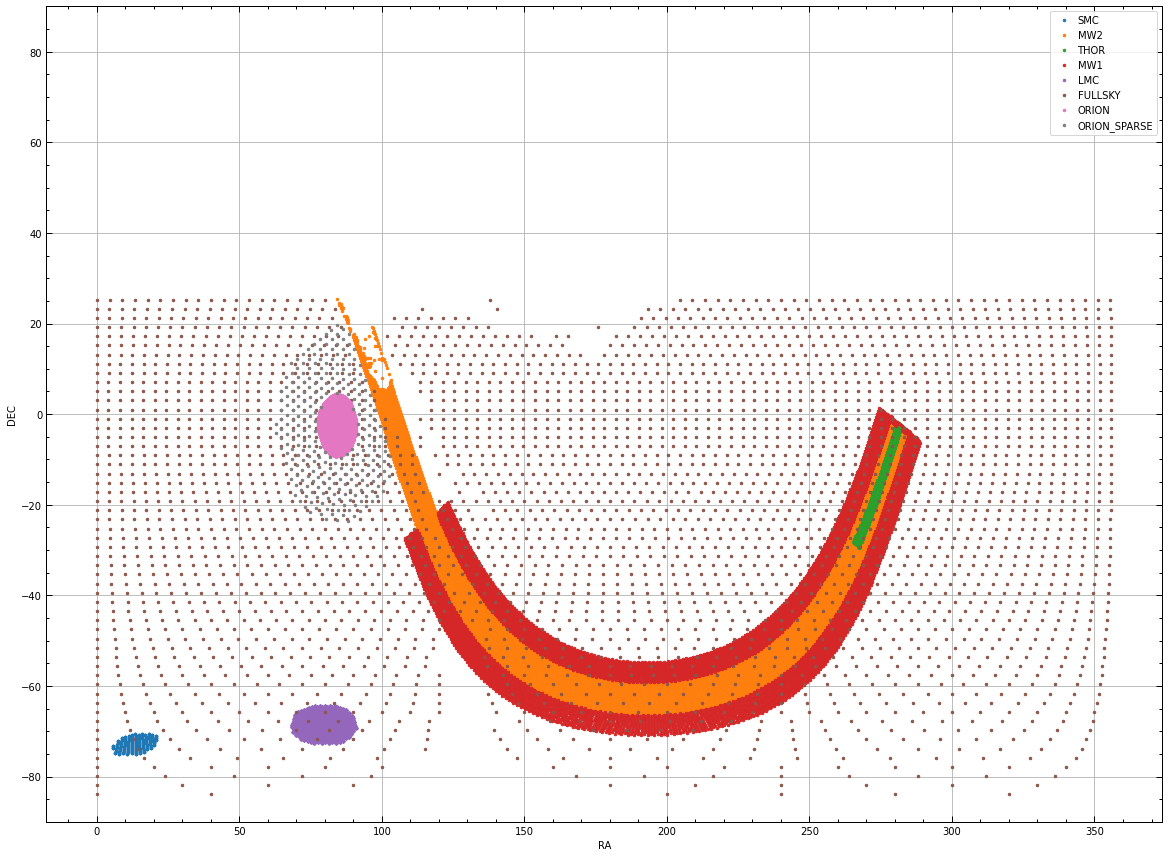

In [24]:
fig,ax = plt.subplots(figsize=(20,15))

#ax.plot(ra,dec,"k.",ms=1)
#ax.plot(ra[selection_mw1],dec[selection_mw1],"r.",ms=1)

for current_target in myset:
    print(current_target)
    selection = (my_data.target==current_target)

    ax.plot(ra[selection],dec[selection],".",ms=5,label=current_target)

ax.legend()

ax.set_ylim(-90,90)
ax.grid()

ax.set_xlabel("RA")
ax.set_ylabel("DEC")

SMC
MW2
THOR
MW1
LMC
FULLSKY
ORION
ORION_SPARSE


/home/haeberle/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "backgroundcolor" which is no longer supported as of 3.3 and will become an error two minor releases later


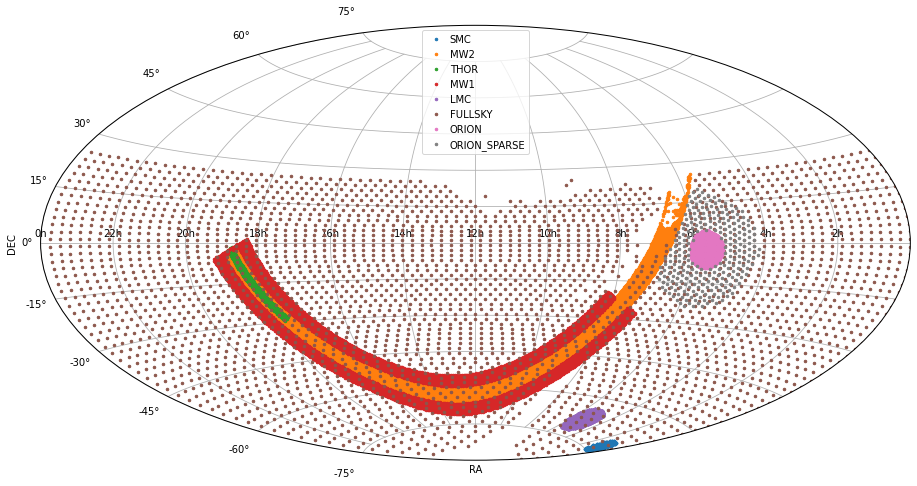

In [273]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='aitoff')
ax.grid()



for current_target in myset:
    print(current_target)
    selection = (my_data.target==current_target)

    ax.plot(-(ra[selection]-180)*np.pi/180,dec[selection]*np.pi/180,".",ms=5,label=current_target)

ax.legend()
ax.set_xlabel("RA")
ax.set_ylabel("DEC")

hours = np.arange(0,24,2)
ax.set_xticks((hours-12)*15*np.pi/180)
ax.set_xticklabels(["0h","22h","20h","18h","16h","14h","12h","10h","8h","6h","4h","2h"])
fig.savefig("/home/haeberle/exchange/lvm/report/pointings.png",dpi=200,bbox_inches="tight",backgroundcolor="w",facecolor="w")

(-10.0, 10.0)

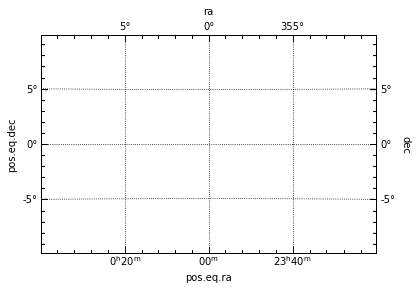

## Real hexagons in standard coordinates

In [60]:
17*15

255

In [12]:
color_dict={
    "THOR":"k",
    "MW1":"b",
    "MW2":"c"
}


In [ ]:

wcs_input_dict = {
    'CTYPE1': 'RA---TAN',
    'CUNIT1': 'deg',
    'CDELT1': -1,
    'CRPIX1': 1,
    'CRVAL1': 0,
    'NAXIS1': 1024,
    'CTYPE2': 'DEC--TAN',
    'CUNIT2': 'deg',
    'CDELT2': 1,
    'CRPIX2': 1,
    'CRVAL2': 0,
    'NAXIS2': 1024
}
wcs_helix_dict = WCS(wcs_input_dict)


fig = plt.figure(figsize=(20,10))

ax = plt.subplot(projection=wcs_helix_dict)


# Overlay the ICRS coordinate grid



ax.set_xlim(-1800,1800)
ax.set_ylim(-600,600)

overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='black', ls='dotted')

#fig = plt.figure(figsize=(30,20))

#ax = fig.add_subplot(projection='wcs')
#ax.grid()


r_fiber_bundle = 29.6/2/60

#fig,ax = plt.subplots(figsize=(30,20))
#ax.plot(ra,dec,"k.",ms=1)
#ax.plot(ra[selection_mw1],dec[selection_mw1],"r.",ms=1)

for current_target in ["THOR","MW2","MW1"]:#myset:
    
    selection = (my_data.target==current_target)
    print(current_target,np.sum(selection))
    l_current = (((b.l.value[selection]+180)%360)-180)
    b_current = (b.b.value[selection])
    
    ra_current = ra[selection]
    dec_current = dec[selection]
    
    #ax.plot(l_current,b_current,".",ms=1,label=current_target)

    
    hexagons = [RegularPolygon((xi, yi), 
                         numVertices = 6,  
                         radius = r_fiber_bundle,  
                         orientation = np.radians(30),  
                         facecolor = "green", 
                         alpha = 0.2, 
                         edgecolor ='k') for xi,yi in zip(ra_current,dec_current)]
    c2 = matplotlib.collections.PatchCollection(hexagons,edgecolor=color_dict[current_target],facecolor="None")
    
    
    #circles = [plt.Circle((xi,yi), radius=0.7) for xi,yi in zip(l_current,b_current)]
    #c = matplotlib.collections.PatchCollection(circles,edgecolor="r",facecolor="None")
    
    
    #ax.add_collection(c)
    ax.add_collection(c2)
    
ax.legend()

#ax.set_xlim(-10,10)

#my_plot = ax.scatter((,,c=n_stars[:,-1],norm=LogNorm(vmin=1,vmax=10000),s=200,marker=".")

THOR 446
MW2 7779
MW1 8324


No handles with labels found to put in legend.


## Real hexagons in Galactic Coordinates

In [55]:
from astropy.wcs import WCS

In [242]:
my_wcs = WCS(naxis=2)
my_wcs.wcs.crpix = [1, 1]
my_wcs.wcs.crval = [0, 0] #Image center
my_wcs.wcs.cunit = ["deg", "deg"]
#my_wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]
#my_wcs.wcs.ctype = ["RA---COP", "DEC--COP"]
my_wcs.wcs.ctype = ["GLON-TAN", "GLAT-TAN"] #Tangential projection

my_wcs.wcs.cdelt = [-1, 1] #Image Scale (1 pix = ???)
my_wcs.array_shape = [1024, 1024]

#In this example, we define two coordinate axes with: 
#* A Gnomonic (tangent-plane) projection, which corresponds to the RA/Dec coordinate system
#* A reference location of (RA,DEC) = (337.52, -20.83), as defined by the CRVALn keys 
#* The pixel at coordinate value (1,1) as the reference location (CRPIXn keys) 
#* Units of degrees (CUNITn = ‘deg’) 
#* Pixel sizes of 1 x 1 arcsec (CDELTn = 0.002778 in degrees) 
#* An image size of 1024 x 1024 pixels (NAXISn key)

### Playing around with coordinates

(-90.0, 90.0)

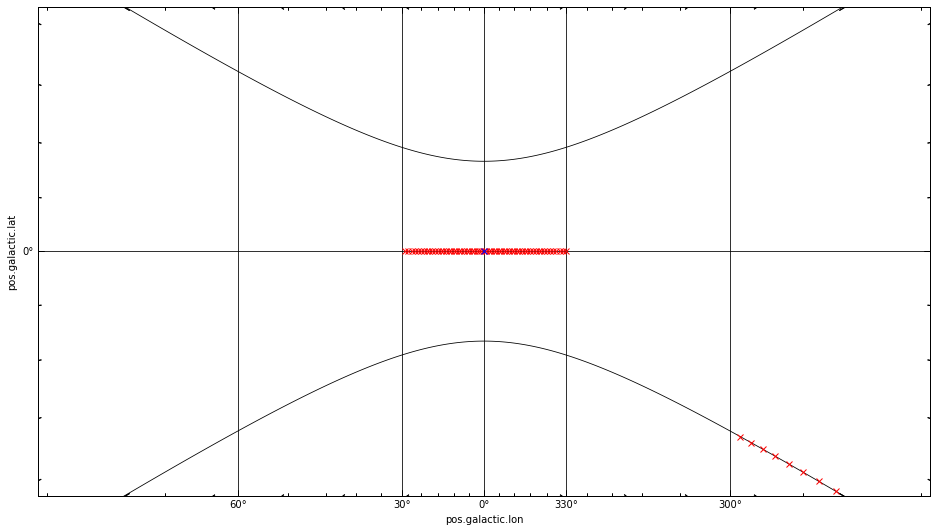

In [236]:

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(projection=my_wcs,label="overlays")




ax.coords.grid(True, color='k', ls='solid')
#ax.coords[0].set_axislabel('Galactic Longitude')
#ax.coords[1].set_axislabel('Galactic Latitude')


#overlay = ax.get_coords_overlay('fk5')
#overlay.grid(color='k', ls='dotted')



#ax.plot(np.arange(-15,15,1),np.arange(-15,15,1),"rx")
ax.plot(np.arange(-30,30,1),np.zeros(60),"rx",transform=ax.get_transform('galactic'))
ax.plot(np.arange(240,300,1),-30*np.ones(60),"rx",transform=ax.get_transform('world'))

#ax.plot(np.arange(-60,60,1),np.arange(-60,60,1),"rx",transform=ax.get_transform('world'))

ax.plot([0],[0],"bx",transform = ax.get_transform("galactic"))

ax.set_xlim(-180,180)
ax.set_ylim(-90,90)

In [ ]:
def create_wcs(projection1,projection2,reference_location,reference_pixels,units,pixel_size,image_size_x,image_size_y):
    wcs_input_dict = {
    'CTYPE1': 'RA---TAN',
    'CUNIT1': 'deg',
    'CDELT1': -1,
    'CRPIX1': 1,
    'CRVAL1': 0,
    'NAXIS1': 1024,
    'CTYPE2': 'DEC--TAN',
    'CUNIT2': 'deg',
    'CDELT2': 1,
    'CRPIX2': 1,
    'CRVAL2': 0,
    'NAXIS2': 1024
}
    
    return WCS(wcs_input_dict)

In [245]:
r_fiber_bundle

0.24666666666666667

In [247]:
l_current

array([ -15.32707622, -139.18373494, -158.61111339, ...,  -26.32245559,
        -23.27215074,  -22.50957453])

THOR 446
MW1 8324
MW2 7779


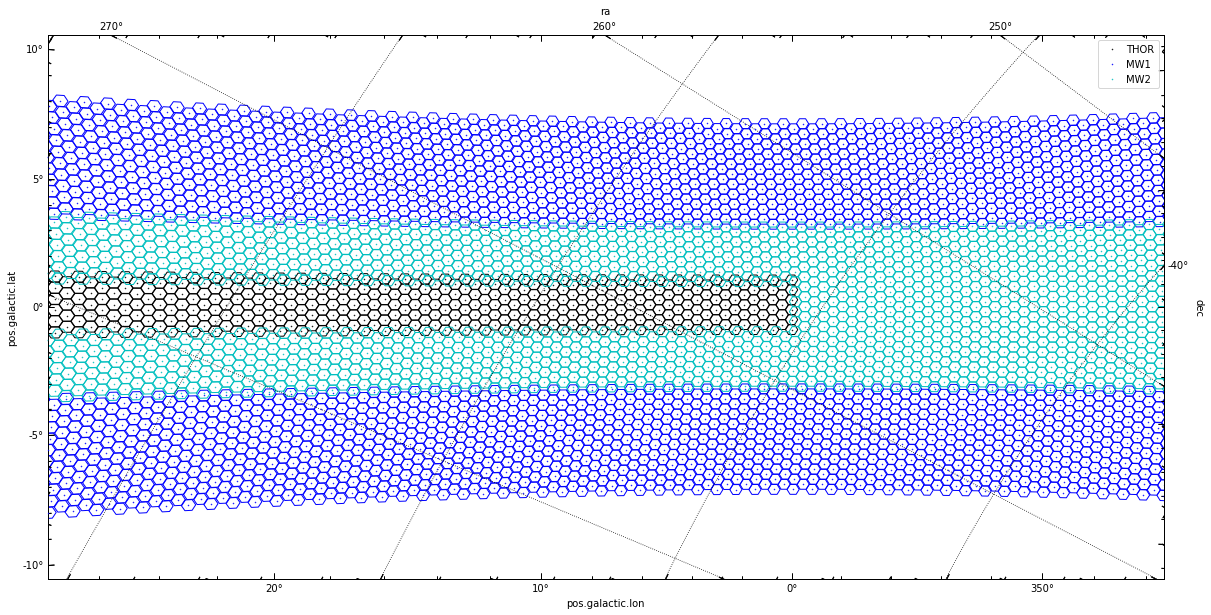

In [259]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(projection=my_wcs,label="overlays")
ax.set_xlim(0, 10000)
ax.set_ylim(-10000, 0)

# Overlay the ICRS coordinate grid
overlay = ax.get_coords_overlay('icrs')
overlay.grid(color='black', ls='dotted')


ax.set_xlim(-30,15)
ax.set_ylim(-12,12)


#fig = plt.figure(figsize=(30,20))

#ax = fig.add_subplot(projection='wcs')
#ax.grid()


r_fiber_bundle = 29.6/2/60

#fig,ax = plt.subplots(figsize=(30,20))
#ax.plot(ra,dec,"k.",ms=1)
#ax.plot(ra[selection_mw1],dec[selection_mw1],"r.",ms=1)

for current_target in ["THOR","MW1","MW2"]:#myset:
    
    selection = (my_data.target==current_target)
    print(current_target,np.sum(selection))
    #l_current = (((b.l.value[selection]+180)%360)-180)
    
    l_current = (b.l.value[selection])
    b_current = (b.b.value[selection])
    ax.plot(l_current,b_current,".",c=color_dict[current_target],ms=1,label=current_target,transform=ax.get_transform('galactic'))

    
    hexagons = [RegularPolygon((xi, yi), 
                         numVertices = 6,  
                         radius = r_fiber_bundle,  
                         orientation = np.radians(30)  
    #                     #facecolor = "green", 
    #                     #alpha = 0.2, 
                          #edgecolor ='k',
                          ) for xi,yi in zip(l_current,b_current)]
    c2 = matplotlib.collections.PatchCollection(hexagons,edgecolor=color_dict[current_target],facecolor="None",transform=ax.get_transform('galactic'))
    
    
    #circles = [plt.Circle((xi,yi), radius=0.7) for xi,yi in zip(l_current,b_current)]
    #c = matplotlib.collections.PatchCollection(circles,edgecolor="r",facecolor="None")
    
    
    #ax.add_collection(c)
    ax.add_collection(c2)
    
ax.legend()

#ax.set_xlim(-10,10)

#my_plot = ax.scatter((,,c=n_stars[:,-1],norm=LogNorm(vmin=1,vmax=10000),s=200,marker=".")

In [21]:
plt.show()

In [ ]:
r_fiber_bundle = 29.6/2/60


In [98]:
r_fiber_bundle

0.24666666666666667

In [107]:
%matplotlib notebook

THOR
MW2
ORION
FULLSKY
MW1
SMC
ORION_SPARSE
LMC


No handles with labels found to put in legend.


(-60.0, 60.0)

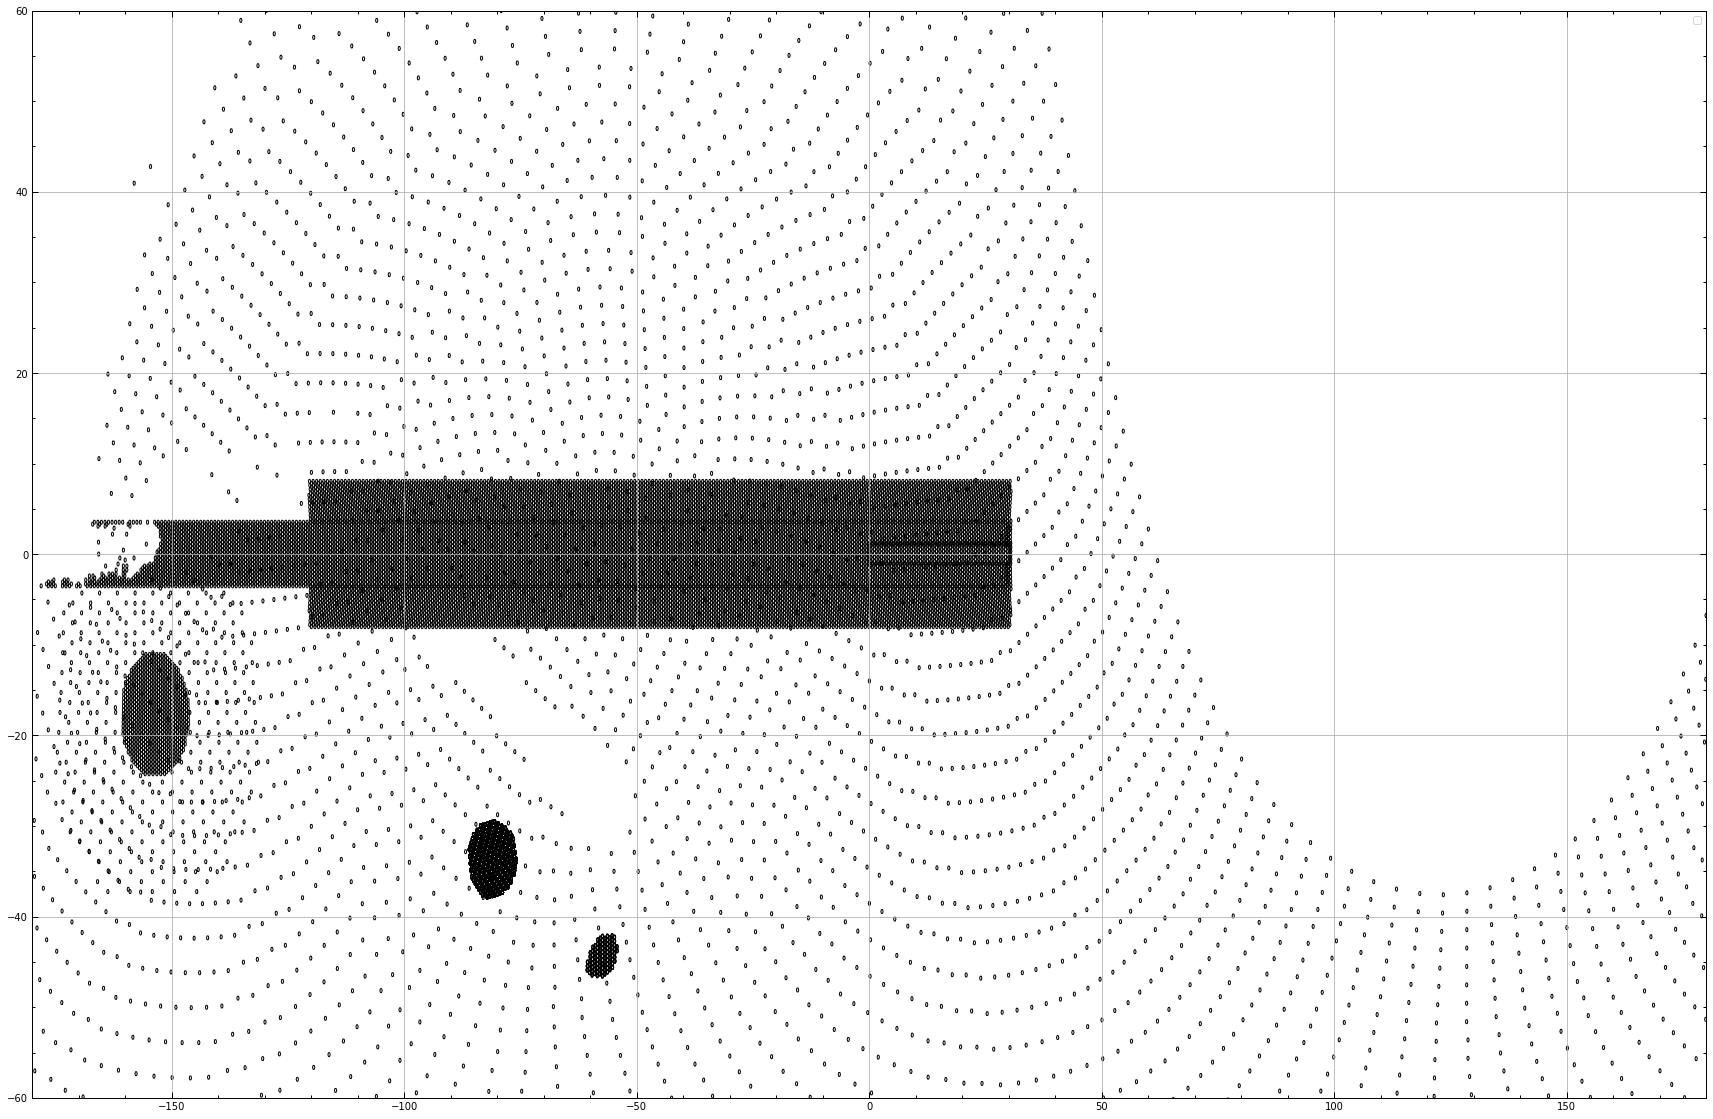

In [59]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot()#projection='aitoff')
ax.grid()



for current_target in myset:#["THOR"]:
    print(current_target)
    selection = (my_data.target==current_target)

    l_current = (((b.l.value[selection]+180)%360)-180)
    b_current = b.b.value[selection]
    
    circles = [plt.Circle((xi,yi), radius=0.7) for xi,yi in zip(l_current,b_current)]
    c = matplotlib.collections.PatchCollection(circles,edgecolor="r",facecolor="None")
    
    hexagons = [RegularPolygon((xi, yi), 
                         numVertices = 6,  
                         radius = r_fiber_bundle,  
                         orientation = np.radians(30),  
                         facecolor = "green", 
                         alpha = 0.2, 
                         edgecolor ='k') for xi,yi in zip(l_current,b_current)]
    c2 = matplotlib.collections.PatchCollection(hexagons,edgecolor="k",facecolor="None")
    
    #ax.add_collection(c)
    ax.add_collection(c2)
    
    #ax.plot(l_current,b_current,"o",ms=1600,label=current_target)

ax.legend()




ax.set_xlim(-180,180)
ax.set_ylim(-60,60)
#ax.set_aspect("equal")

In [61]:
my_ms

1674.0

In [83]:
c[0]

TypeError: 'PatchCollection' object does not support indexing